In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

# import from utils.ipynb
import ipynb.fs.full.utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = False
X=7
currency_pair = 'NOK=X'
numbers_in_currency = 'NOK'
share_name = 'NHY.OL'

# 1.2. Raw input statement data

In [3]:
route = f"../csv_files/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

## (OPTIONAL) Time Filtering - Last 7 years daat

In [4]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares
0,2006-03-31,52019,0,52019,4708,20762,0,15230,88136,0,...,239643,0,0,3855,69923,20814,146508,15497,-3587,1241
1,2006-06-30,48816,0,48816,5769,7725,0,15985,83400,0,...,233854,0,0,3545,68926,19942,143418,7178,-3584,1241
2,2006-09-30,24303,0,24303,-4833,16490,0,16310,93086,0,...,247428,0,0,3346,75765,20653,152092,18349,-3885,1241
3,2006-12-31,23514,0,23514,323,6609,0,14220,183670,0,...,234460,0,0,2509,120424,367,138628,-19997,8048,1241
4,2007-03-31,26754,0,26754,3257,21780,0,14380,195454,0,...,245059,0,0,2502,126070,335,145047,14841,-3289,1209


## Calculate date when quaterly reports could be available

In [5]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [6]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
67,2022-12-31,2023-02-11,2051,44075,-28857,15218,157,29805,0,30035,...,9280,198618,0,0,6746,42807,26029,96163,8409,-3690
68,2023-03-31,2023-04-21,2029,48534,-31295,17239,1144,30873,0,30216,...,9839,211395,0,0,5899,42342,29615,102813,3704,-2633
69,2023-06-30,2023-07-21,2029,53630,-32109,21521,5056,22453,0,28808,...,10215,208506,0,0,5271,40393,29756,101633,10110,-3476
70,2023-09-30,2023-10-21,2029,44702,-30501,14201,-625,19105,0,27648,...,10823,205260,0,0,5764,41718,29944,102197,5088,-3200
71,2023-12-31,2024-02-11,2029,46754,-29633,17121,-2772,24618,0,25449,...,8447,206462,0,0,7111,43892,28978,105884,3130,-4329


## Pull historical average USD national currency rates and add to the dataframe

In [7]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
67,2022-12-31,2023-02-11,2051,44075,-28857,15218,157,29805,0,30035,...,198618,0,0,6746,42807,26029,96163,8409,-3690,10.186402
68,2023-03-31,2023-04-21,2029,48534,-31295,17239,1144,30873,0,30216,...,211395,0,0,5899,42342,29615,102813,3704,-2633,10.221379
69,2023-06-30,2023-07-21,2029,53630,-32109,21521,5056,22453,0,28808,...,208506,0,0,5271,40393,29756,101633,10110,-3476,10.699984
70,2023-09-30,2023-10-21,2029,44702,-30501,14201,-625,19105,0,27648,...,205260,0,0,5764,41718,29944,102197,5088,-3200,10.483742
71,2023-12-31,2024-02-11,2029,46754,-29633,17121,-2772,24618,0,25449,...,206462,0,0,7111,43892,28978,105884,3130,-4329,10.821103


## Convert USD values related to IS, BS, CFS to national currency

In [8]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
67,2022-12-31,2023-02-11,2051,44075,-28857,15218,157,29805,0,30035,...,198618,0,0,6746,42807,26029,96163,8409,-3690,10.186402
68,2023-03-31,2023-04-21,2029,48534,-31295,17239,1144,30873,0,30216,...,211395,0,0,5899,42342,29615,102813,3704,-2633,10.221379
69,2023-06-30,2023-07-21,2029,53630,-32109,21521,5056,22453,0,28808,...,208506,0,0,5271,40393,29756,101633,10110,-3476,10.699984
70,2023-09-30,2023-10-21,2029,44702,-30501,14201,-625,19105,0,27648,...,205260,0,0,5764,41718,29944,102197,5088,-3200,10.483742
71,2023-12-31,2024-02-11,2029,46754,-29633,17121,-2772,24618,0,25449,...,206462,0,0,7111,43892,28978,105884,3130,-4329,10.821103


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [9]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [10]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

In [11]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [12]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2006-04-24,29.609438,2006-03-31,52019.0,15.174859,75.048348,1241.0,76336.0,61.511684,20762.0,...,0.388641,0.611359,inf,0.0,10.021963,0.0,1.0,0.090505,0.078584,0.202201
1,2006-05-01,30.295849,2006-03-31,52019.0,15.174859,75.048348,1241.0,76336.0,61.511684,20762.0,...,0.388641,0.611359,inf,0.0,10.021963,0.0,1.0,0.090505,0.078584,0.202201
2,2006-05-08,29.328627,2006-03-31,52019.0,15.174859,75.048348,1241.0,76336.0,61.511684,20762.0,...,0.388641,0.611359,inf,0.0,10.021963,0.0,1.0,0.090505,0.078584,0.202201
3,2006-05-15,27.008575,2006-03-31,52019.0,15.174859,75.048348,1241.0,76336.0,61.511684,20762.0,...,0.388641,0.611359,inf,0.0,10.021963,0.0,1.0,0.090505,0.078584,0.202201
4,2006-05-22,28.675764,2006-03-31,52019.0,15.174859,75.048348,1241.0,76336.0,61.511684,20762.0,...,0.388641,0.611359,inf,0.0,10.021963,0.0,1.0,0.090505,0.078584,0.202201


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [13]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2006-04-24,29.609438,2006-03-31,52019.0,15.174859,75.048348,1241.0,76336.0,61.511684,20762.0,...,0.0,1.0,0.090505,0.078584,0.202201,1.951217,0.394538,0.176596,0.780923,0.481363
1,2006-05-01,30.295849,2006-03-31,52019.0,15.174859,75.048348,1241.0,76336.0,61.511684,20762.0,...,0.0,1.0,0.090505,0.078584,0.202201,1.996450,0.403684,0.180690,0.785017,0.492522
2,2006-05-08,29.328627,2006-03-31,52019.0,15.174859,75.048348,1241.0,76336.0,61.511684,20762.0,...,0.0,1.0,0.090505,0.078584,0.202201,1.932712,0.390796,0.174921,0.779248,0.476798
3,2006-05-15,27.008575,2006-03-31,52019.0,15.174859,75.048348,1241.0,76336.0,61.511684,20762.0,...,0.0,1.0,0.090505,0.078584,0.202201,1.779824,0.359882,0.161084,0.765411,0.439080
4,2006-05-22,28.675764,2006-03-31,52019.0,15.174859,75.048348,1241.0,76336.0,61.511684,20762.0,...,0.0,1.0,0.090505,0.078584,0.202201,1.889689,0.382097,0.171027,0.775354,0.466184


# Calculate Dividend yield and currency-share price correlation

In [14]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

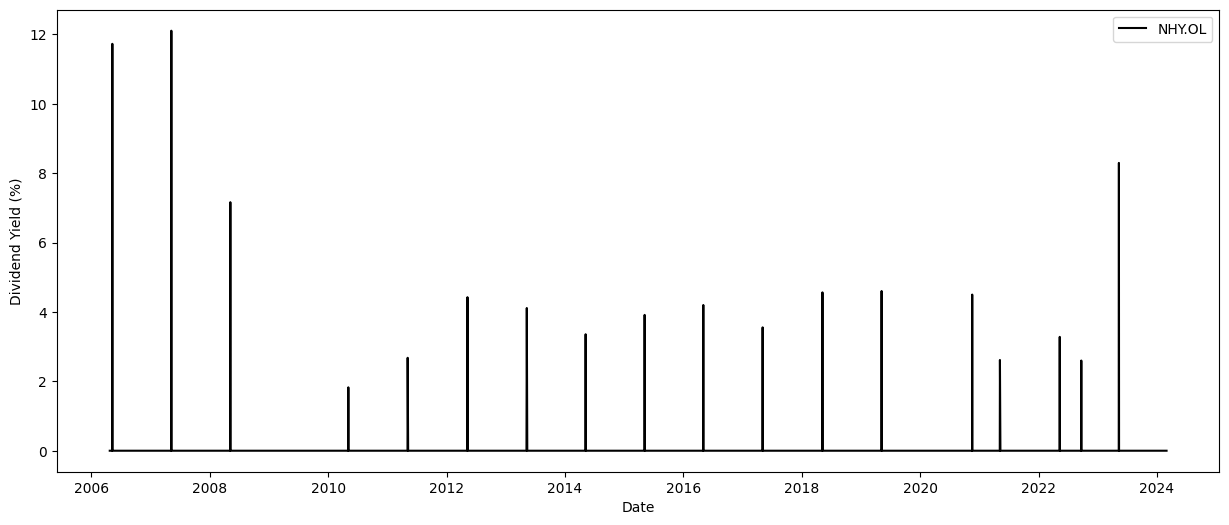

In [15]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate    0.581129
share_price      1.000000
Name: share_price, dtype: float64


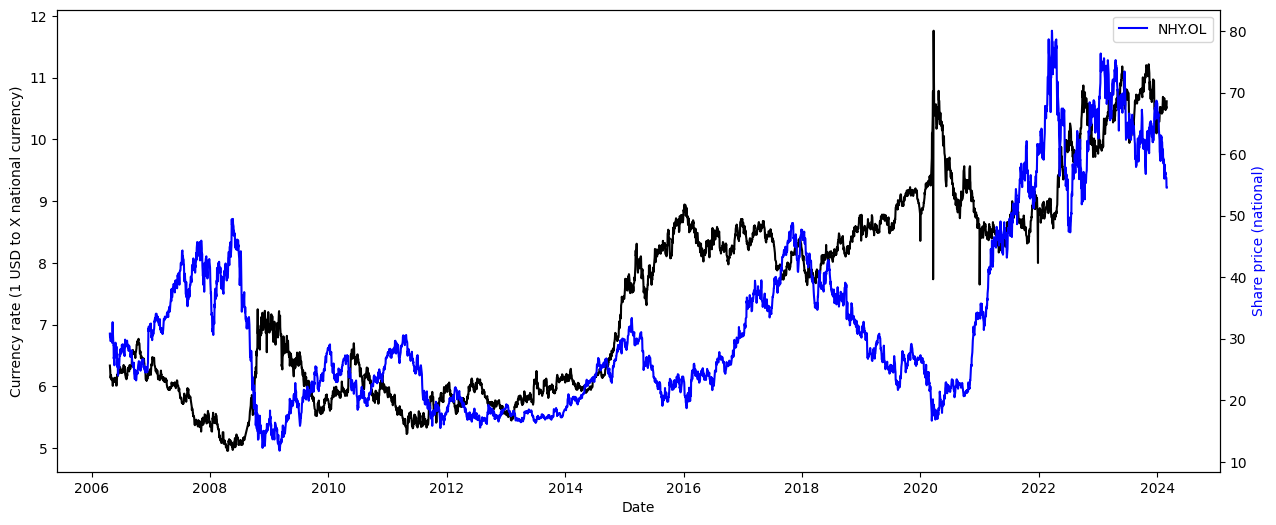

In [16]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

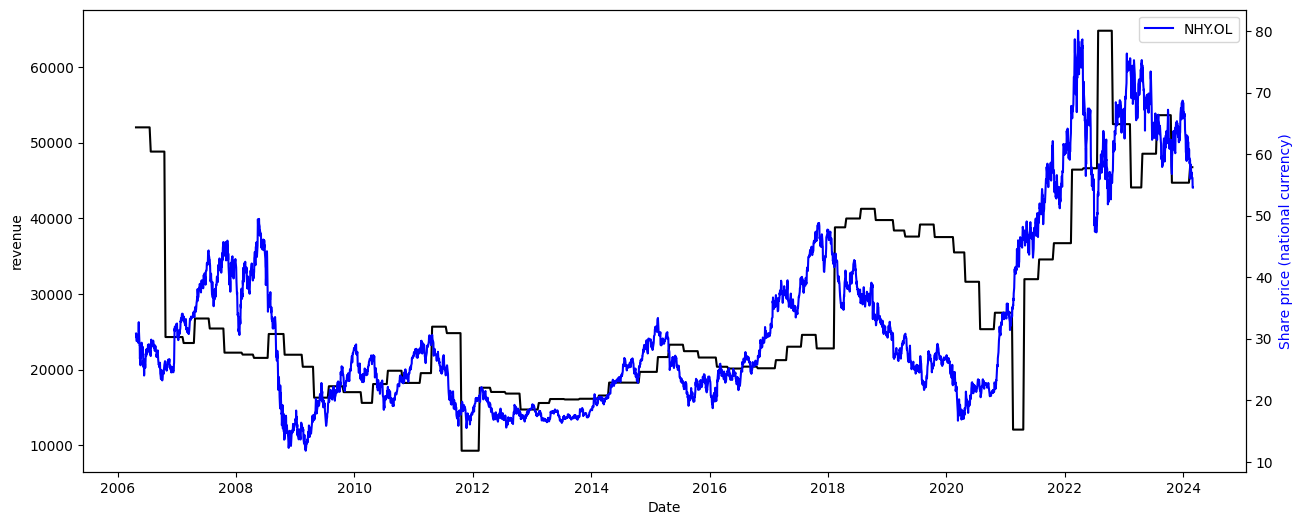

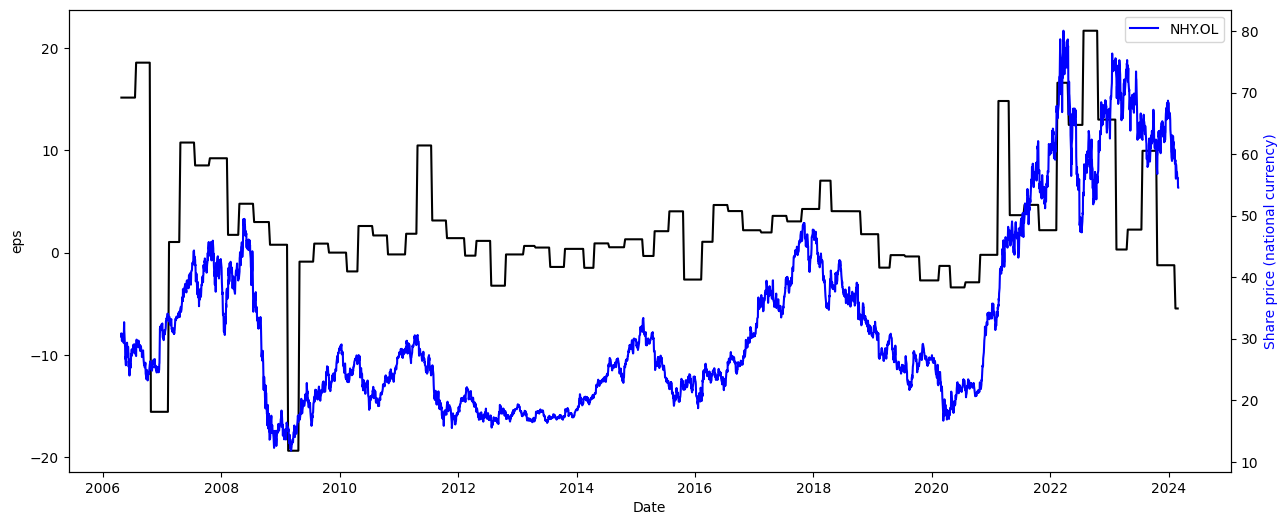

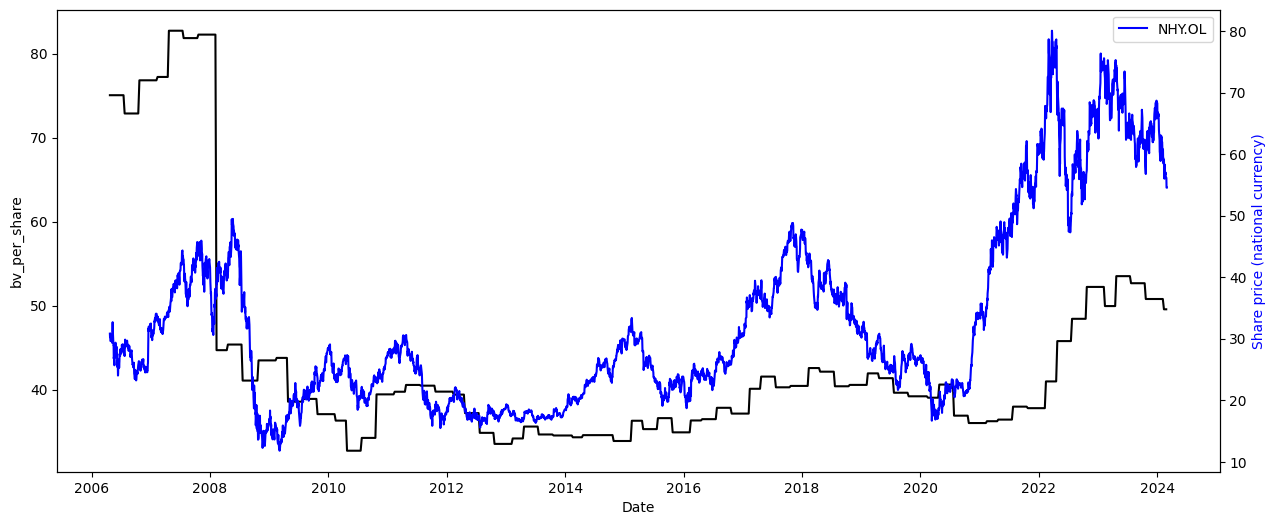

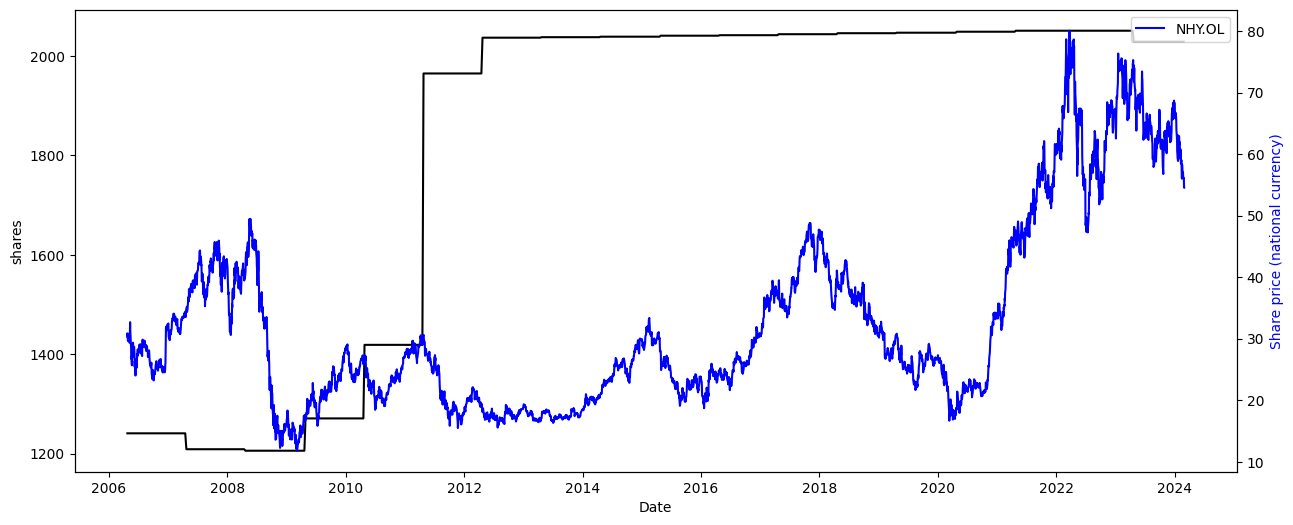

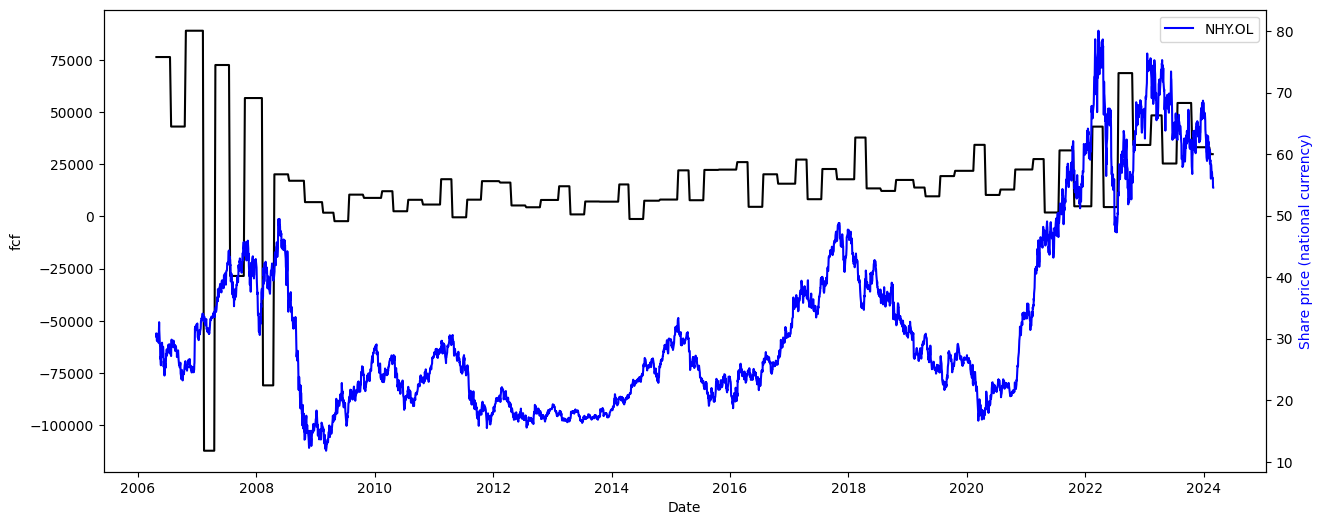

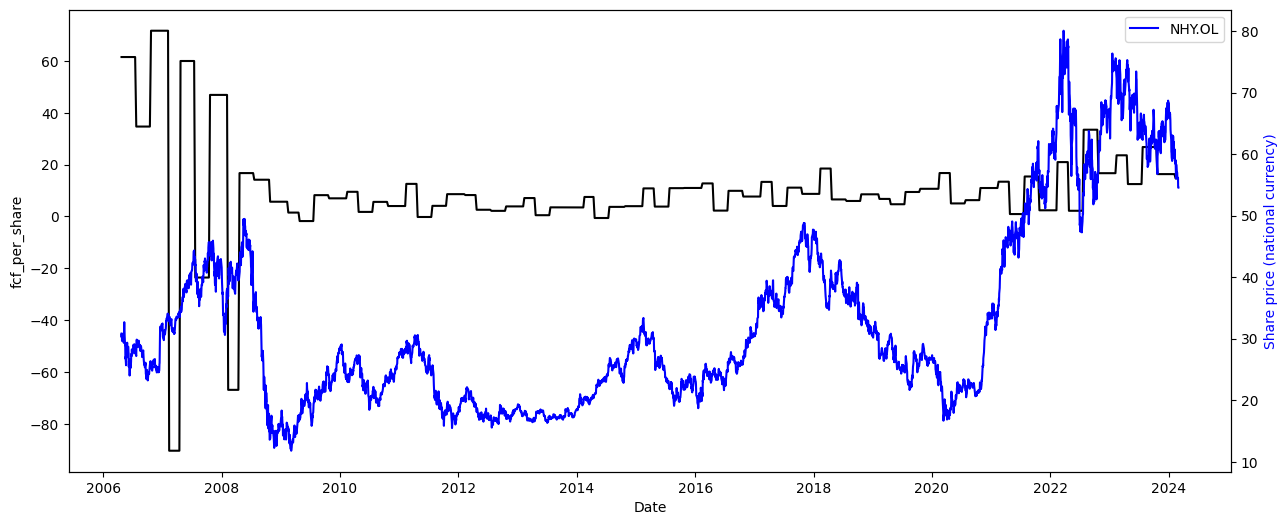

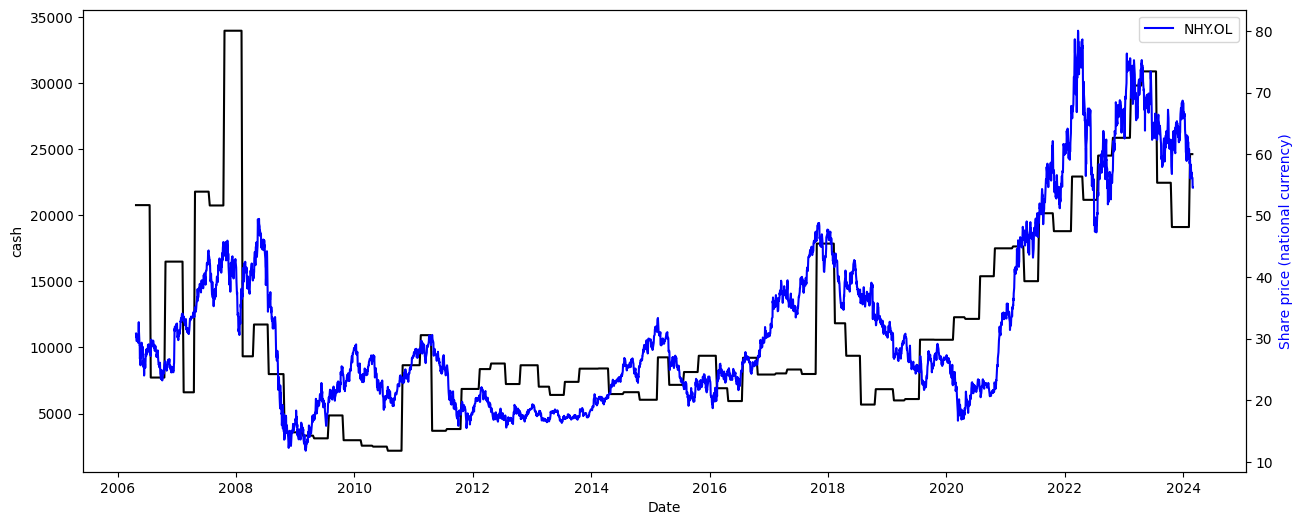

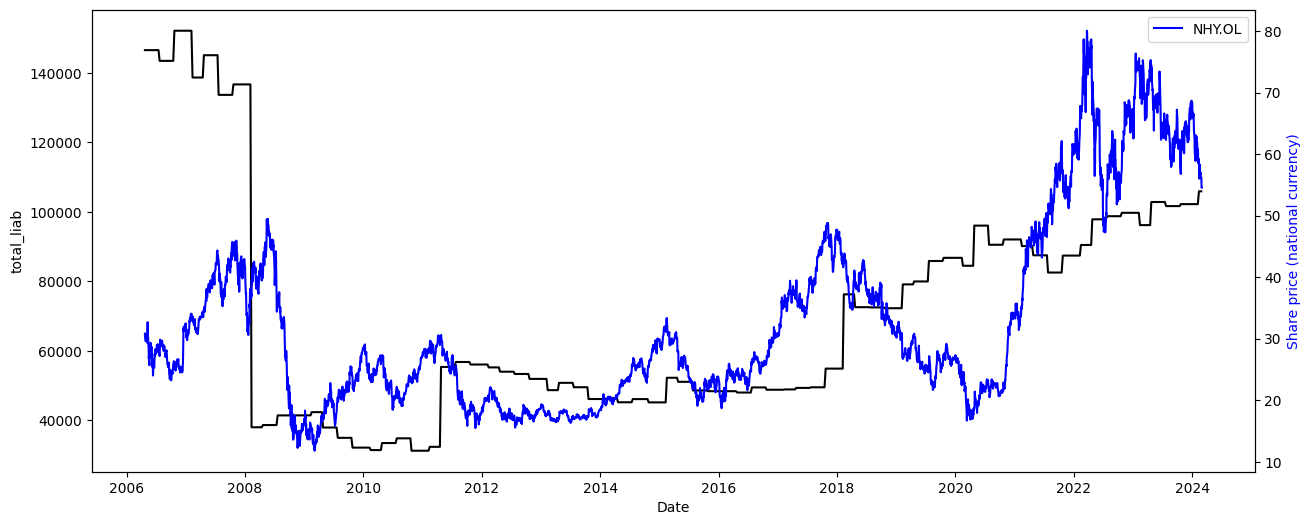

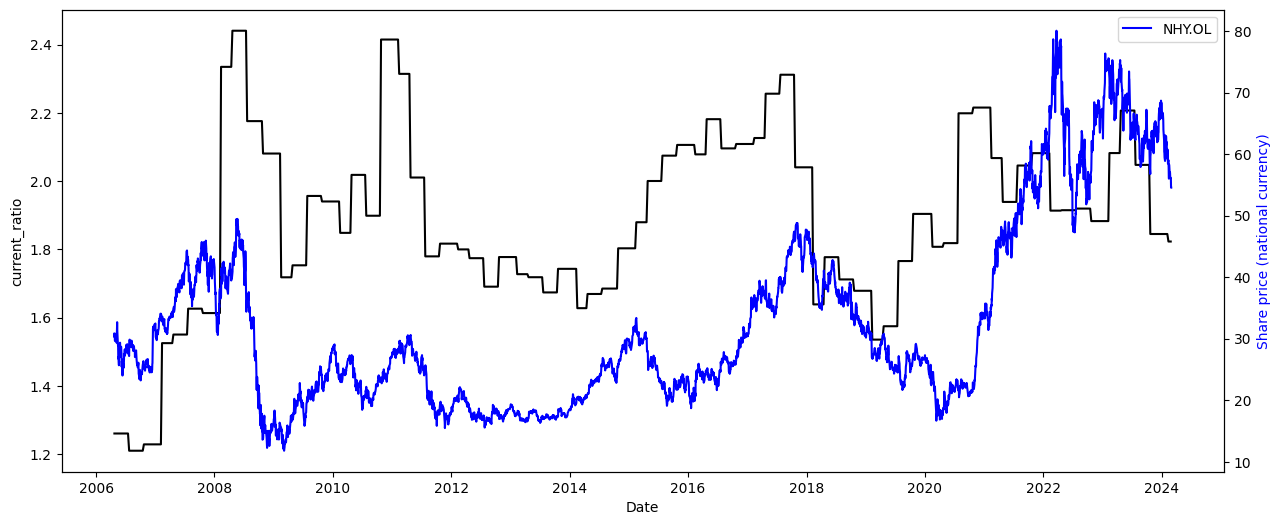

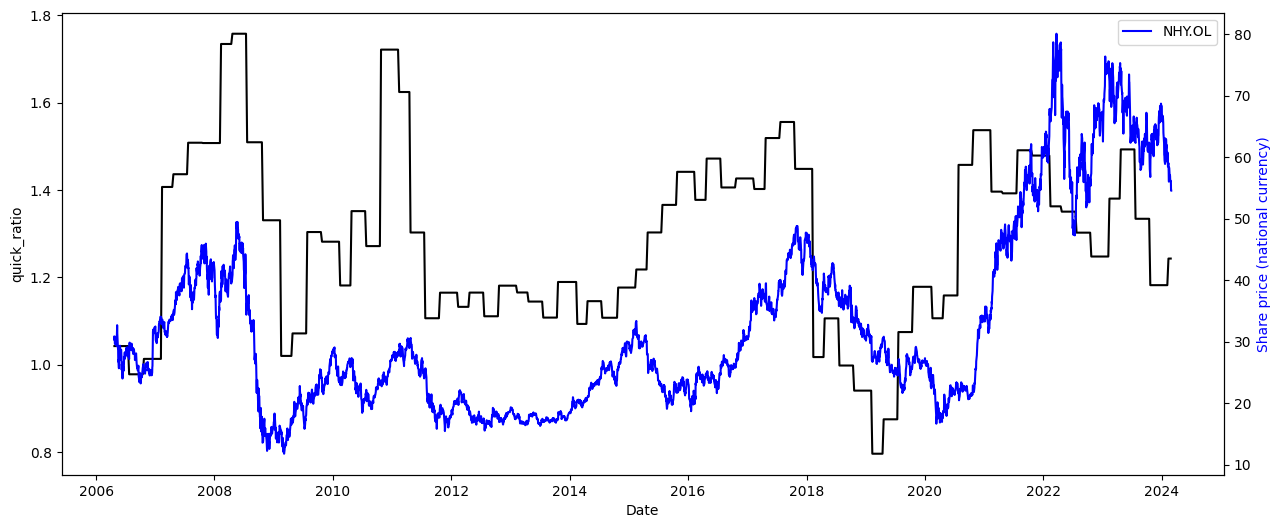

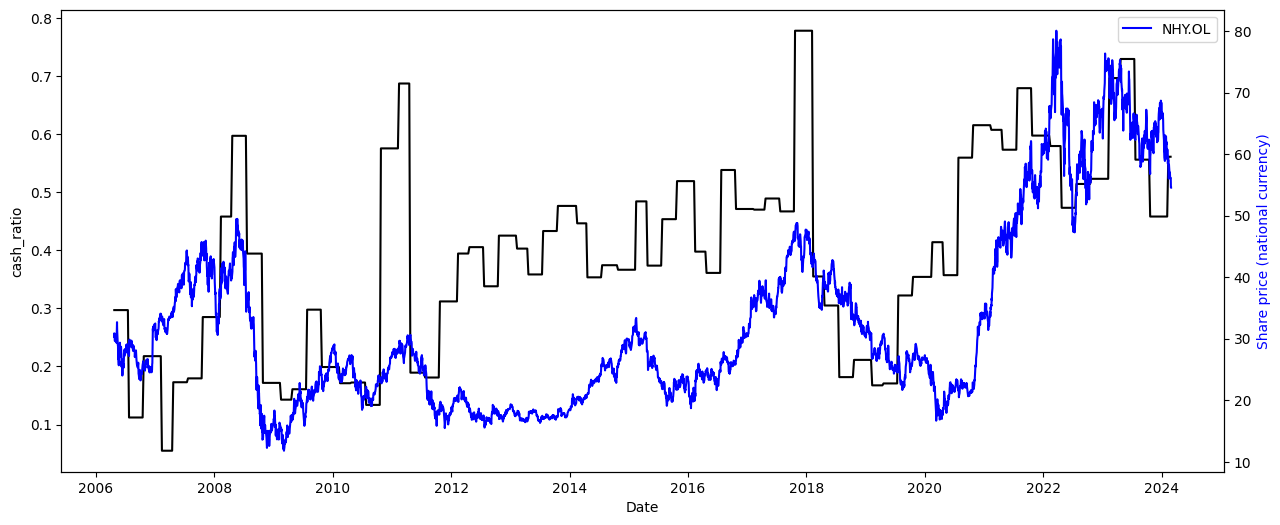

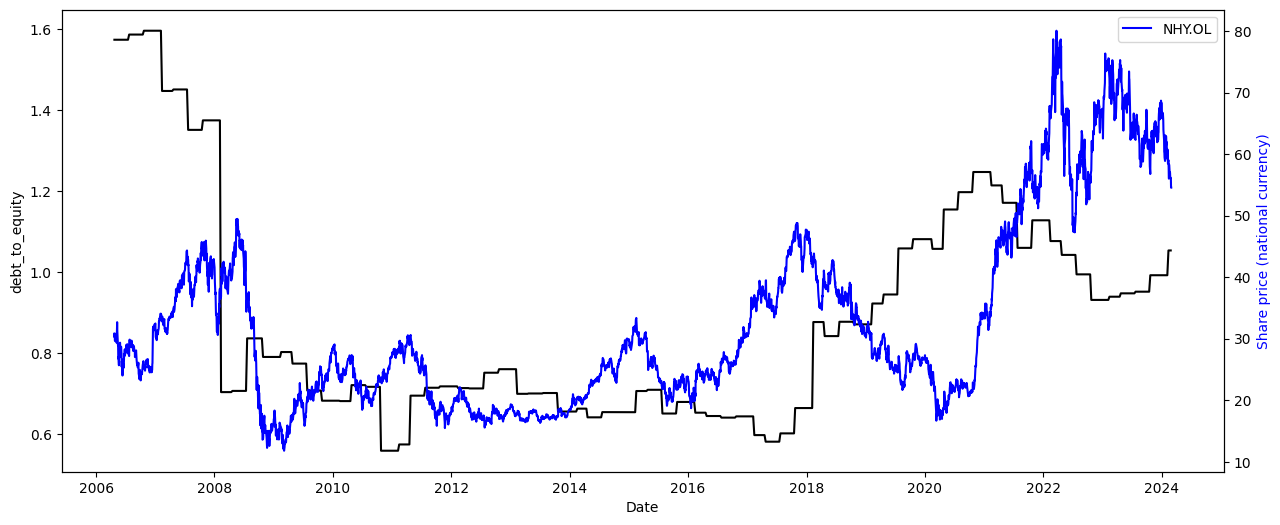

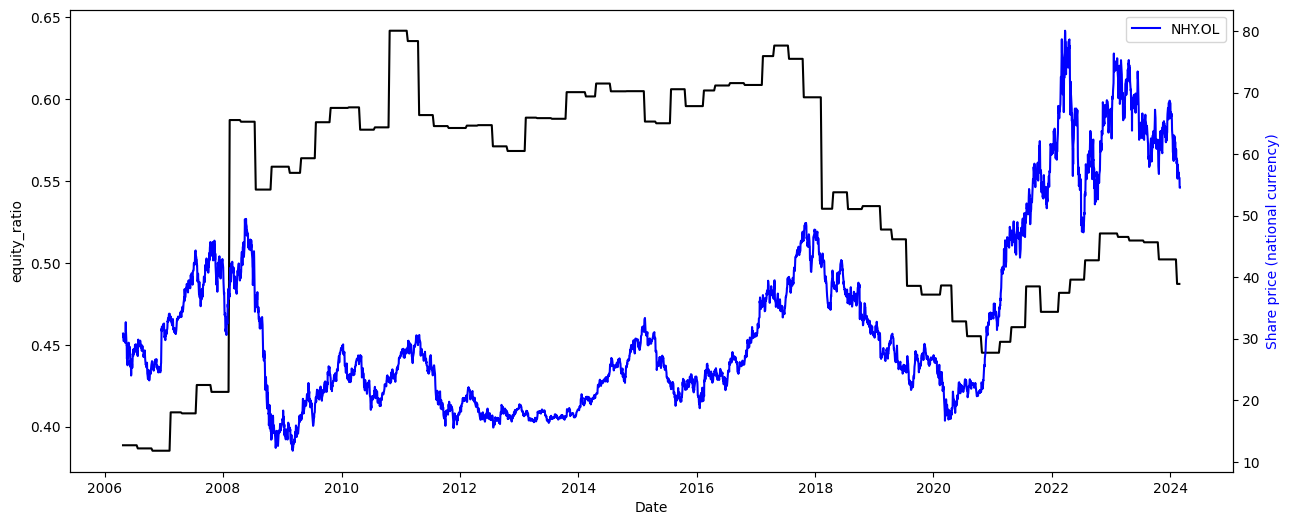

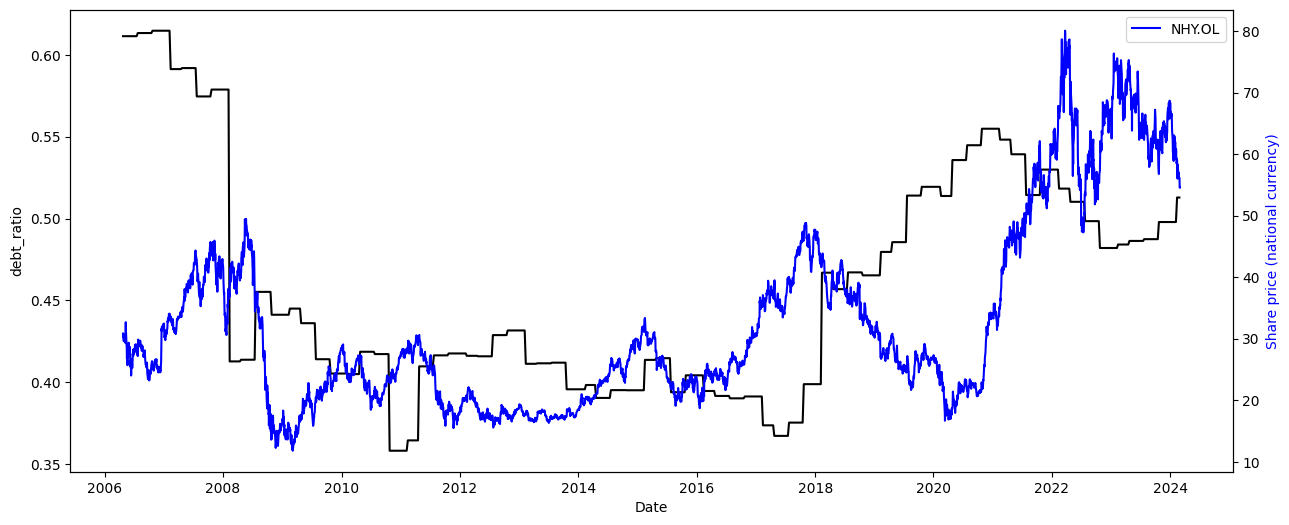

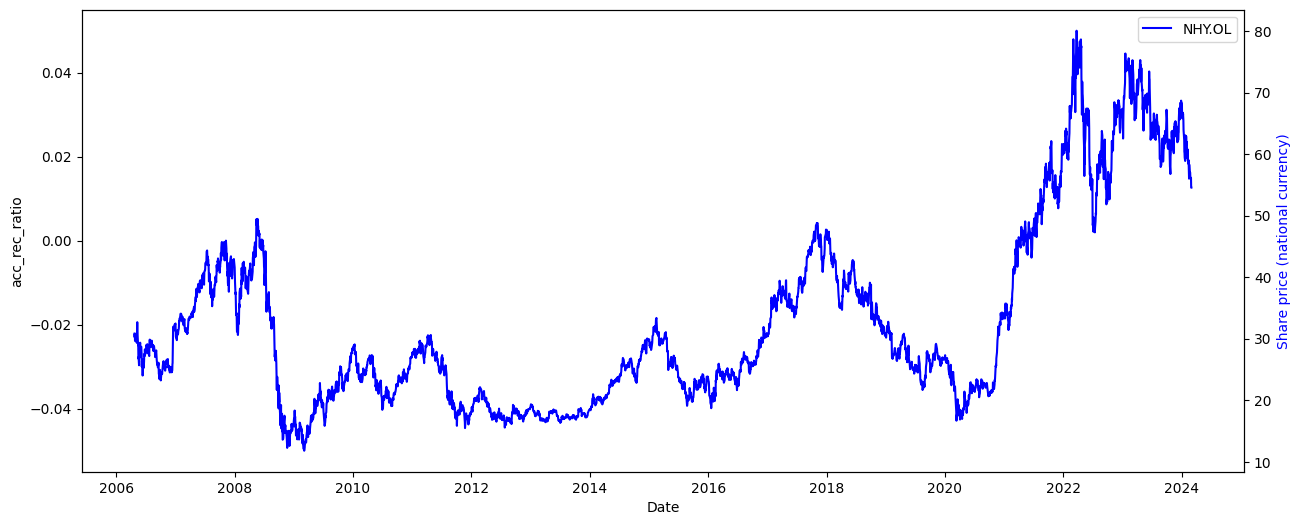

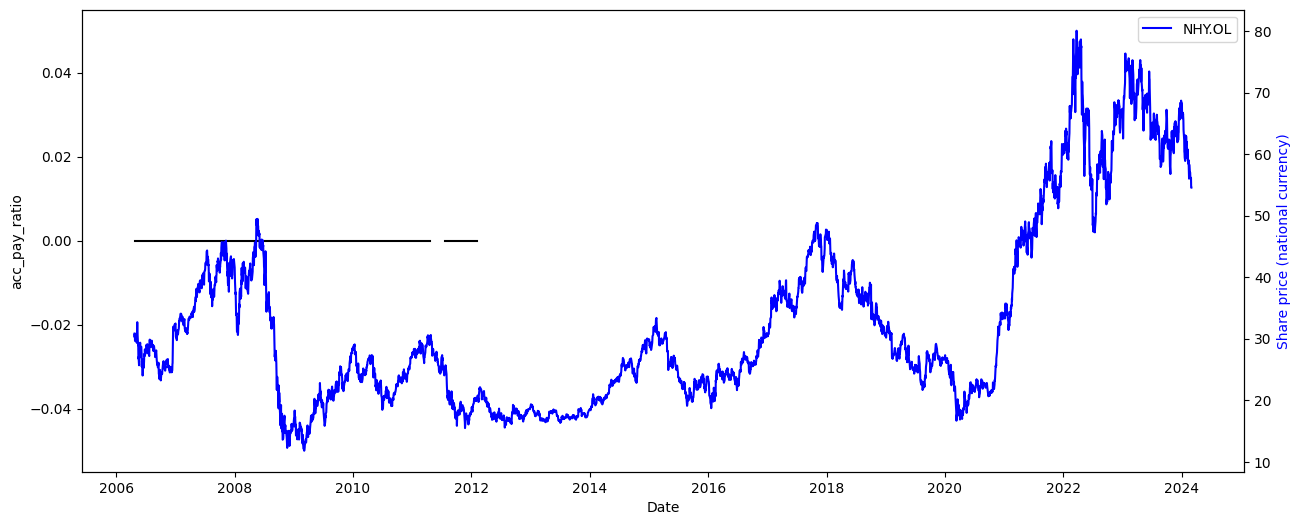

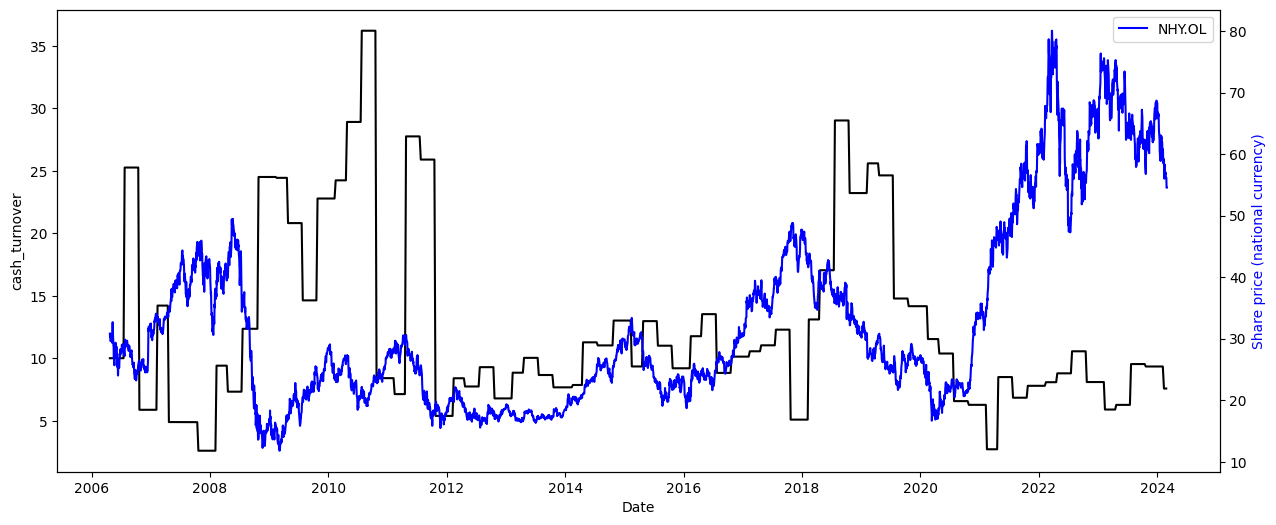

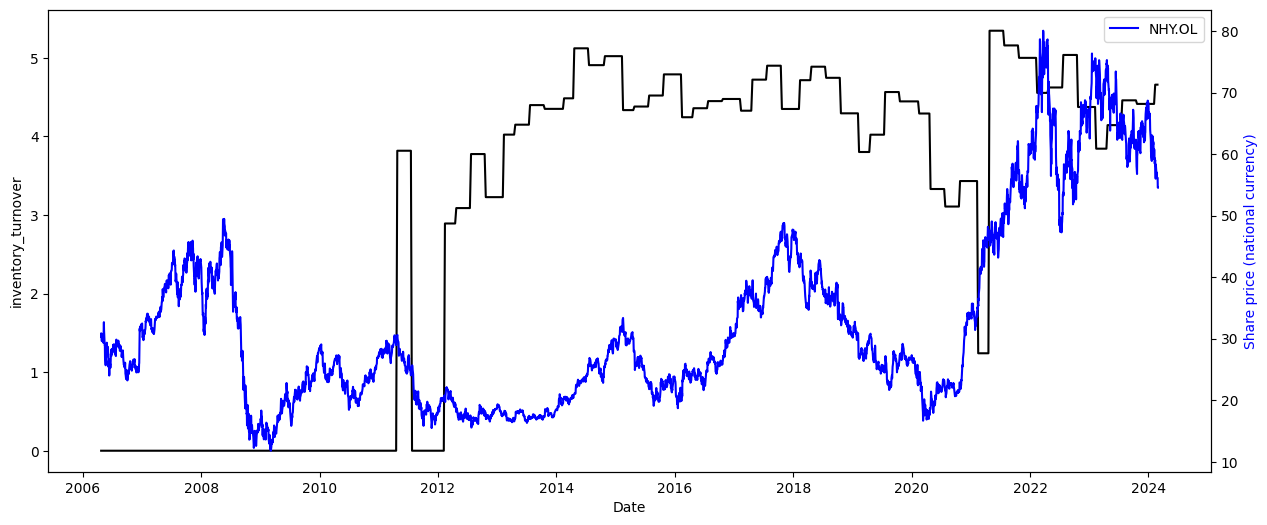

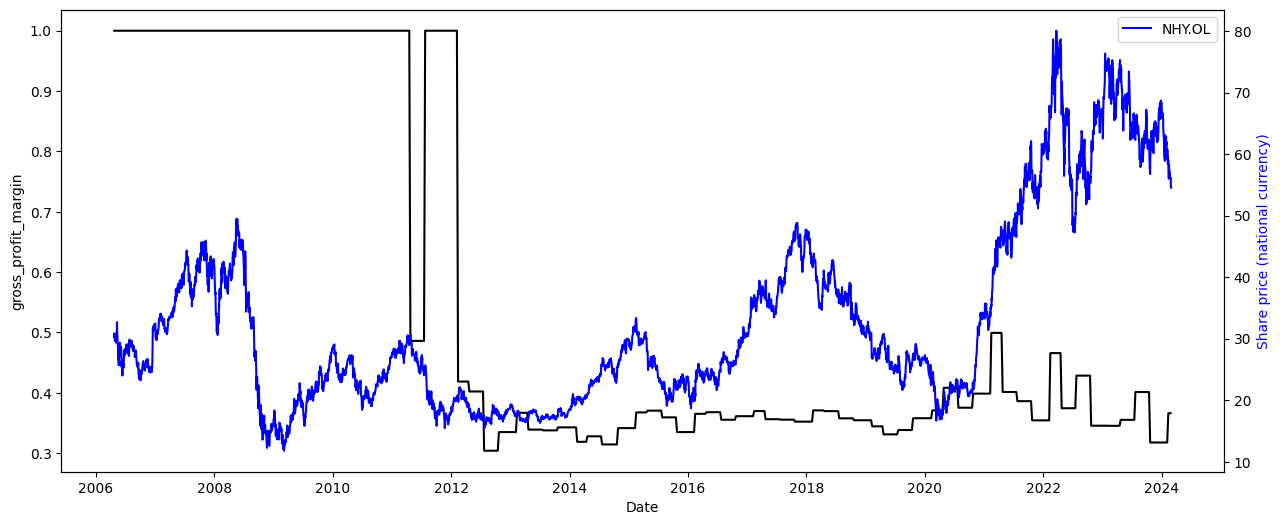

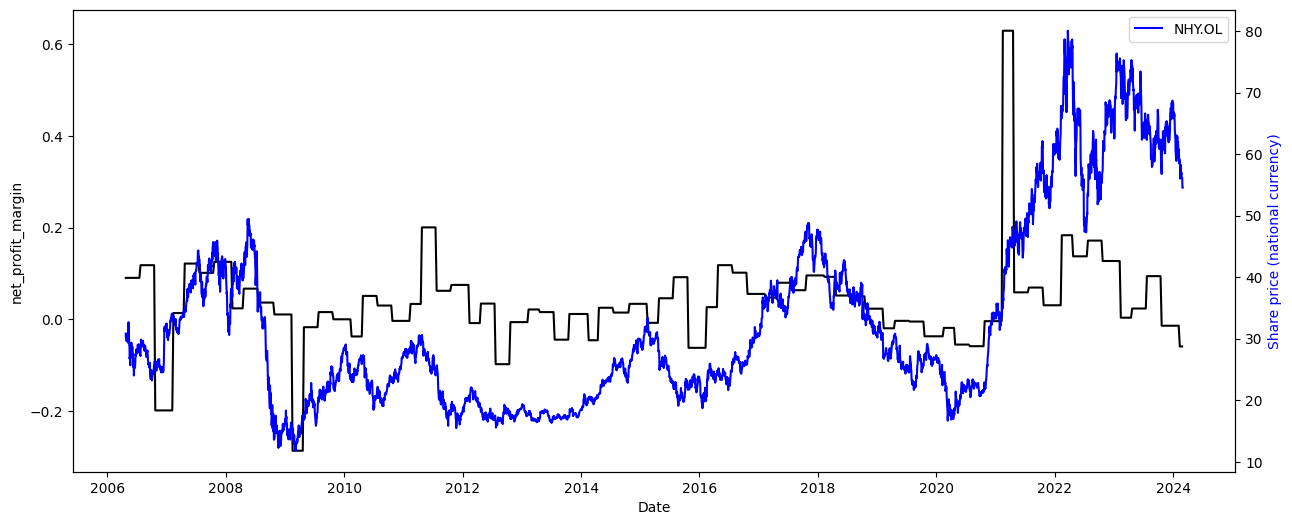

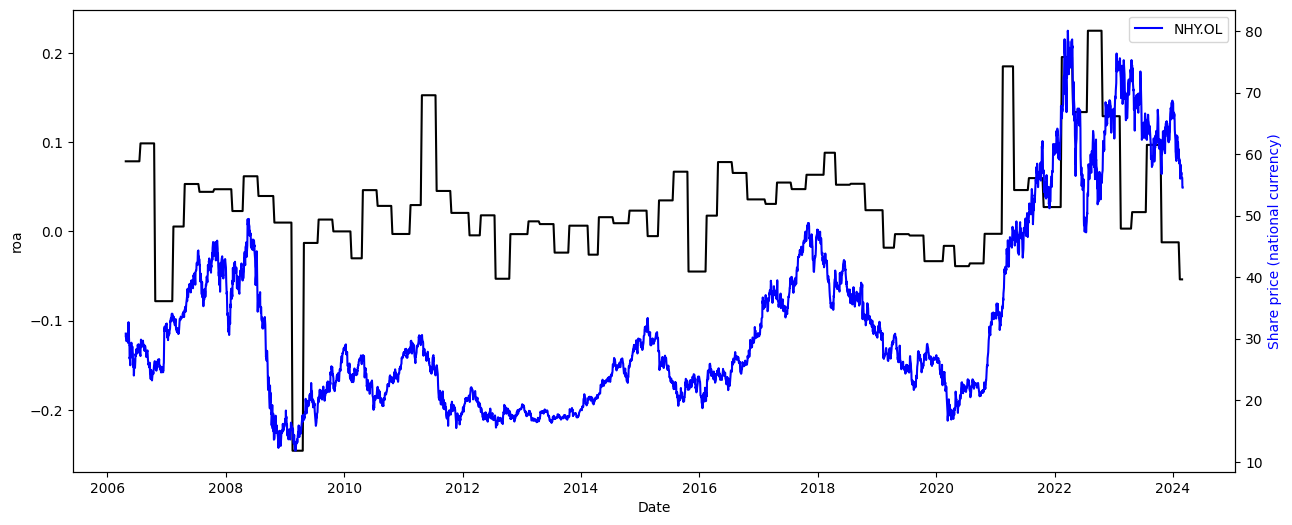

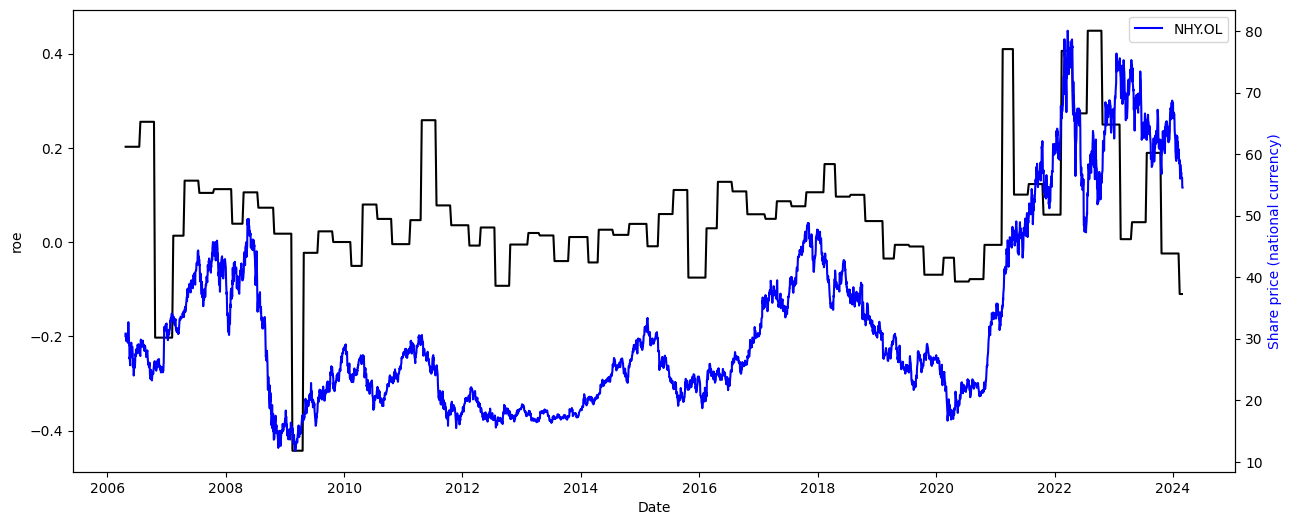

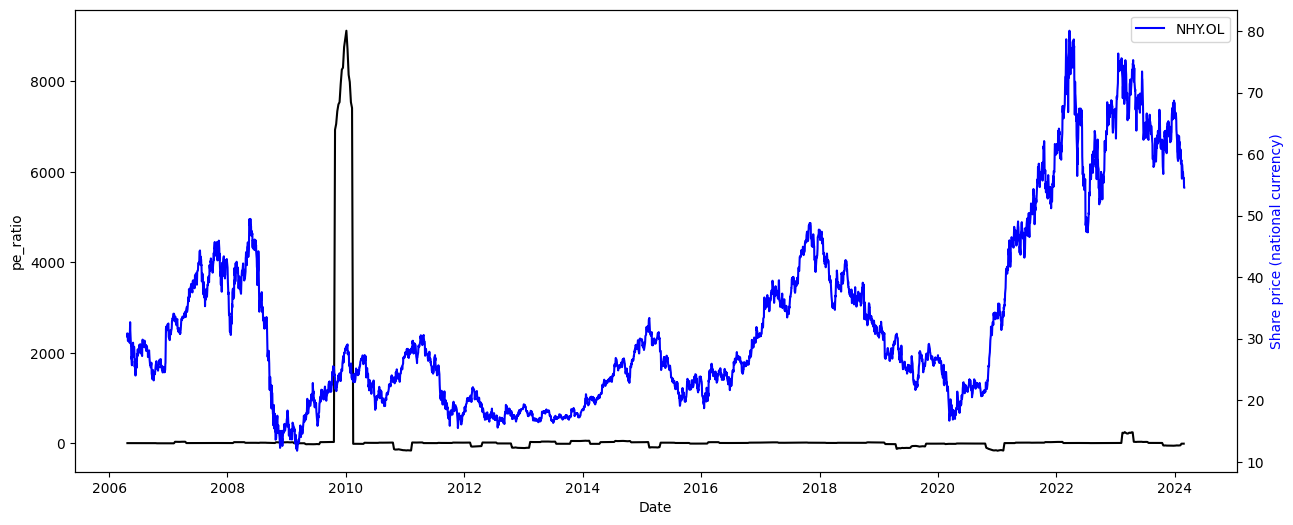

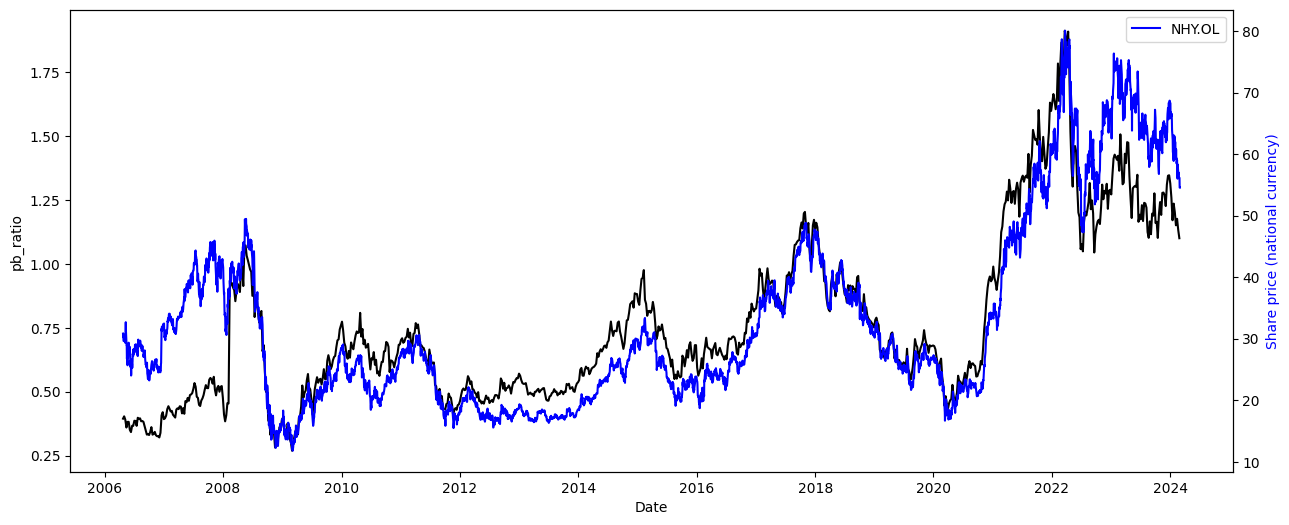

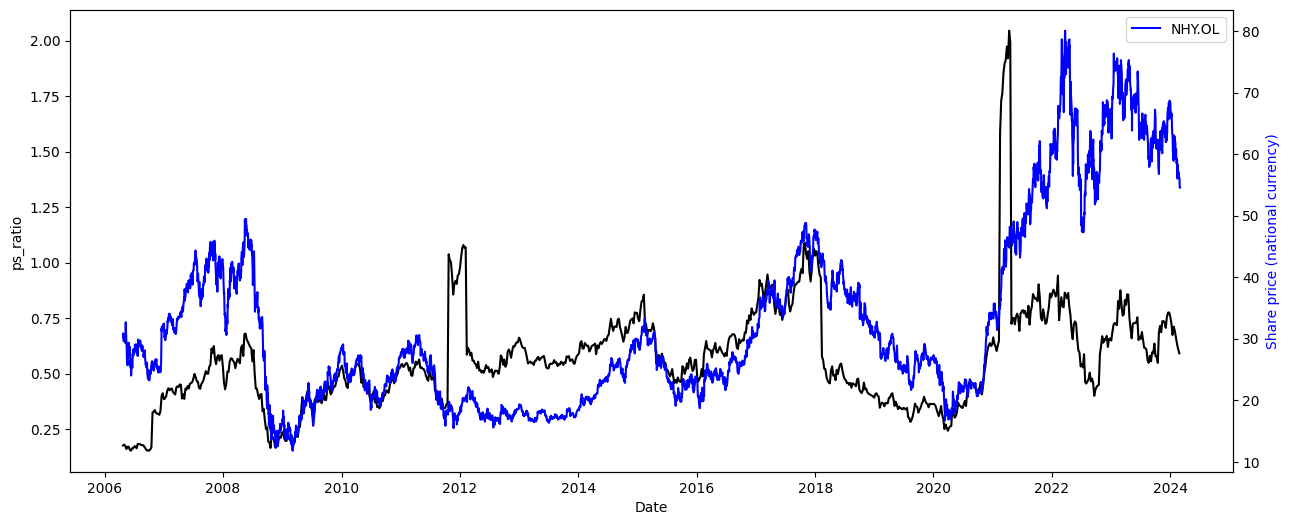

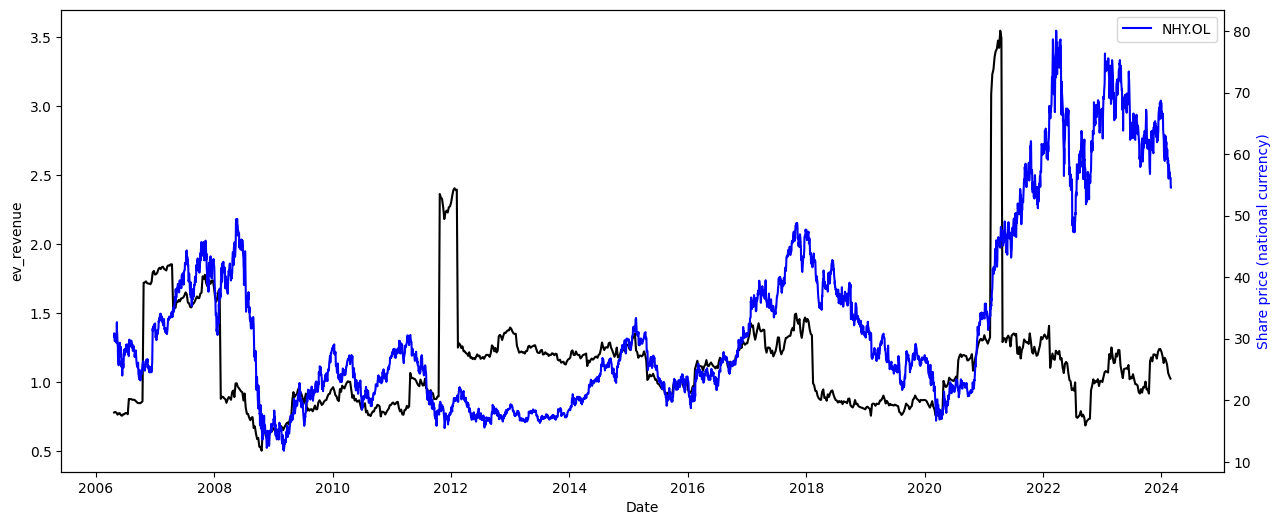

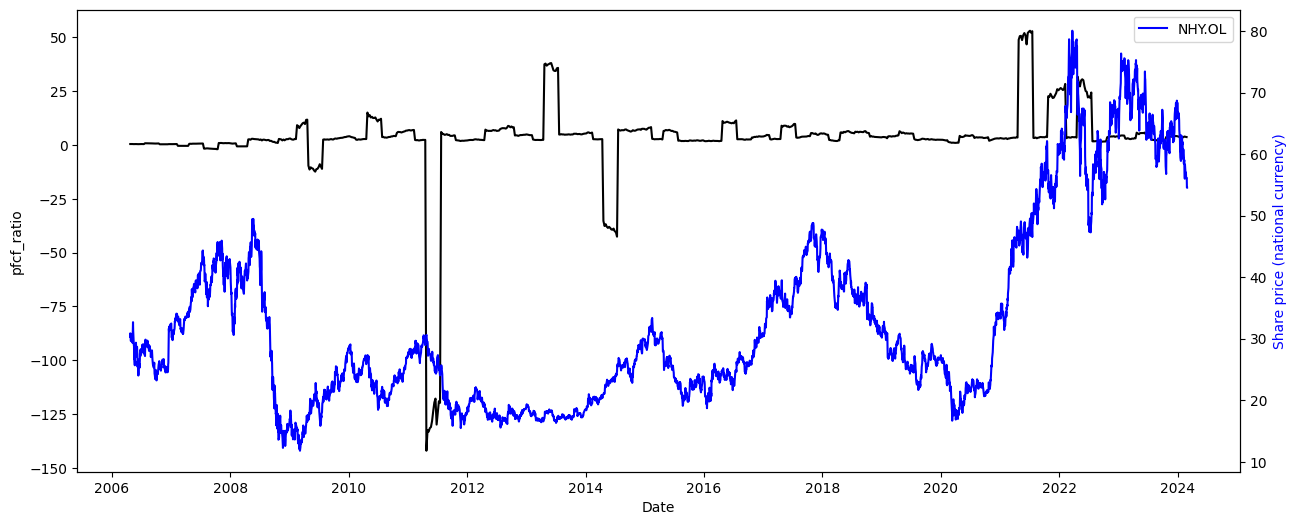

In [17]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

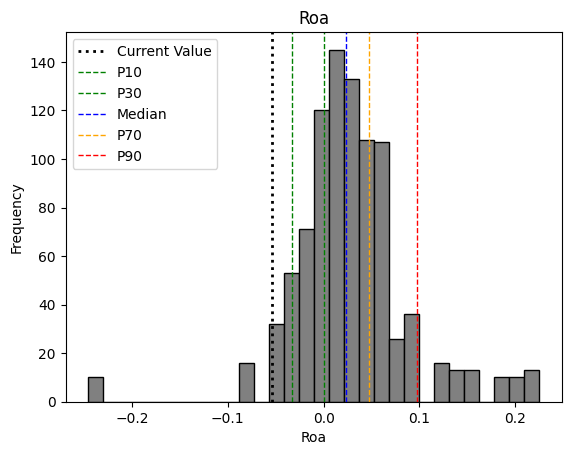

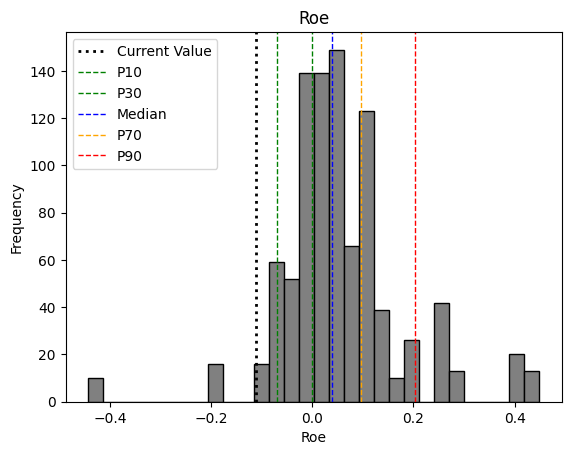

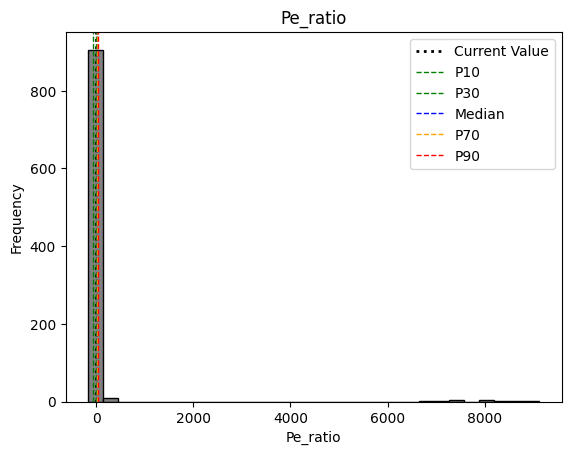

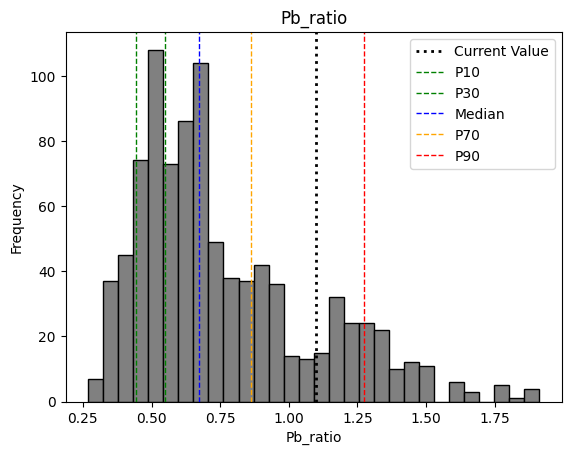

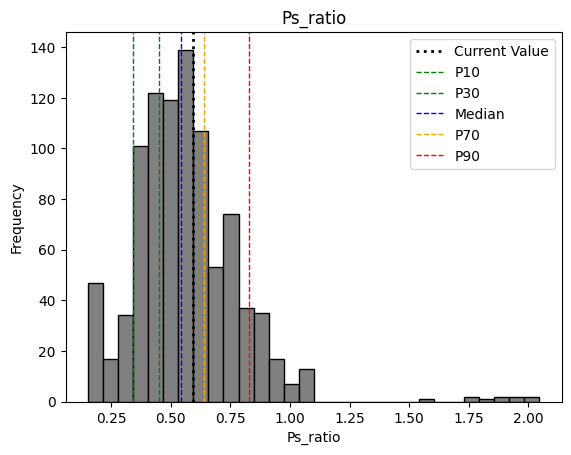

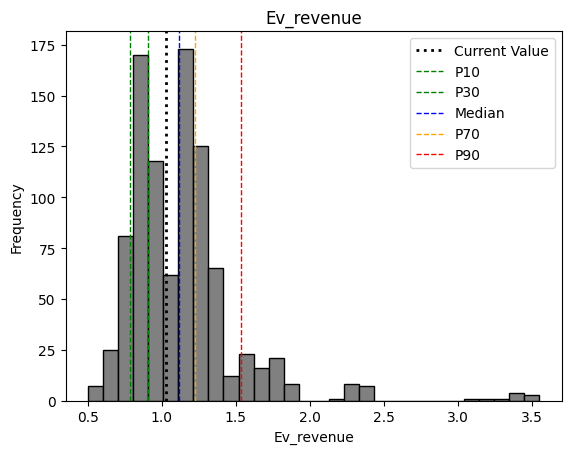

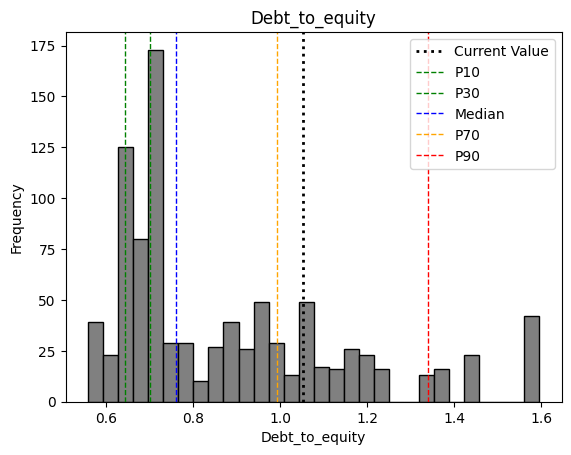

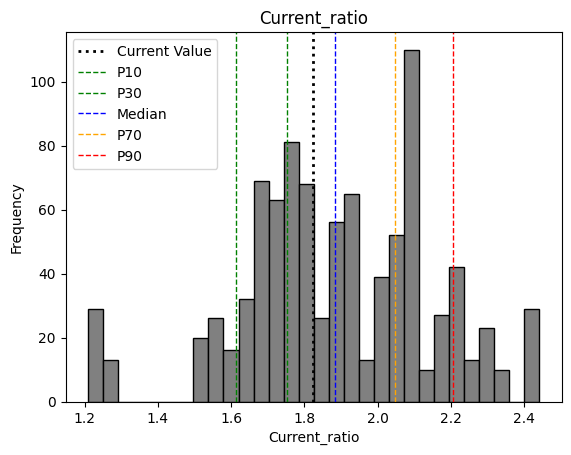

In [18]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[])

## Calculate correlation between value parameters

In [19]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.990635,-0.052906,0.471228,0.328685,0.120582,0.078756,0.152279
roe,0.990635,1.000000,-0.051319,0.461619,0.317227,0.130087,0.136561,0.103145
pe_ratio,-0.052906,-0.051319,1.000000,-0.025978,-0.046713,-0.077218,-0.100046,0.024295
pb_ratio,0.471228,0.461619,-0.025978,1.000000,0.588970,0.094546,0.004360,0.414170
ps_ratio,0.328685,0.317227,-0.046713,0.588970,1.000000,0.732561,-0.203547,0.358828
ev_revenue,0.120582,0.130087,-0.077218,0.094546,0.732561,1.000000,0.246137,-0.113930
debt_to_equity,0.078756,0.136561,-0.100046,0.004360,-0.203547,0.246137,1.000000,-0.509743
current_ratio,0.152279,0.103145,0.024295,0.414170,0.358828,-0.113930,-0.509743,1.000000


0 timestemos have been found!


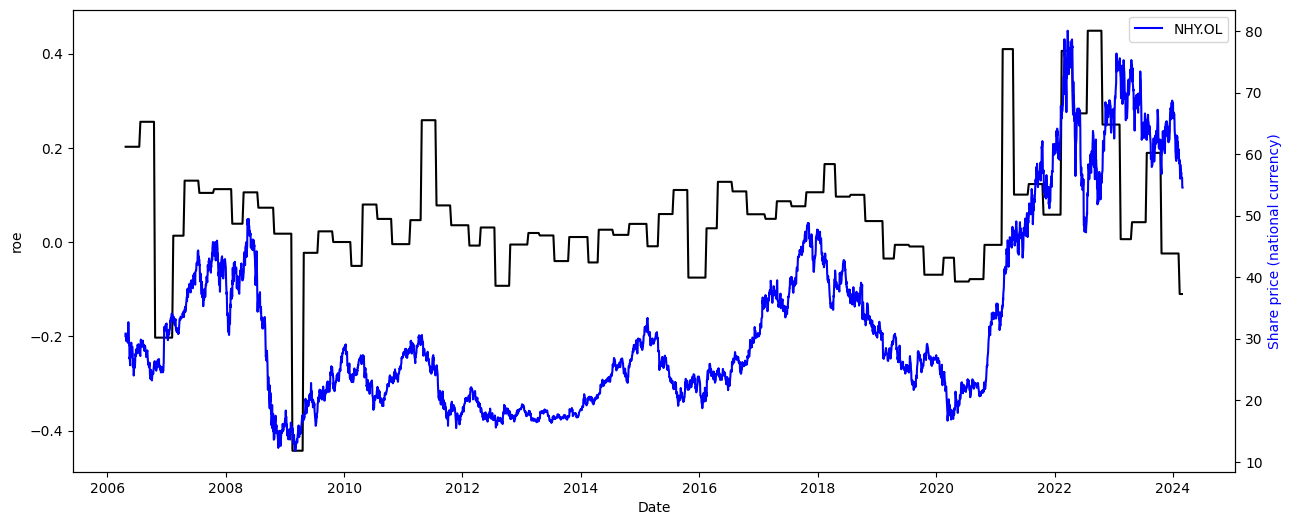

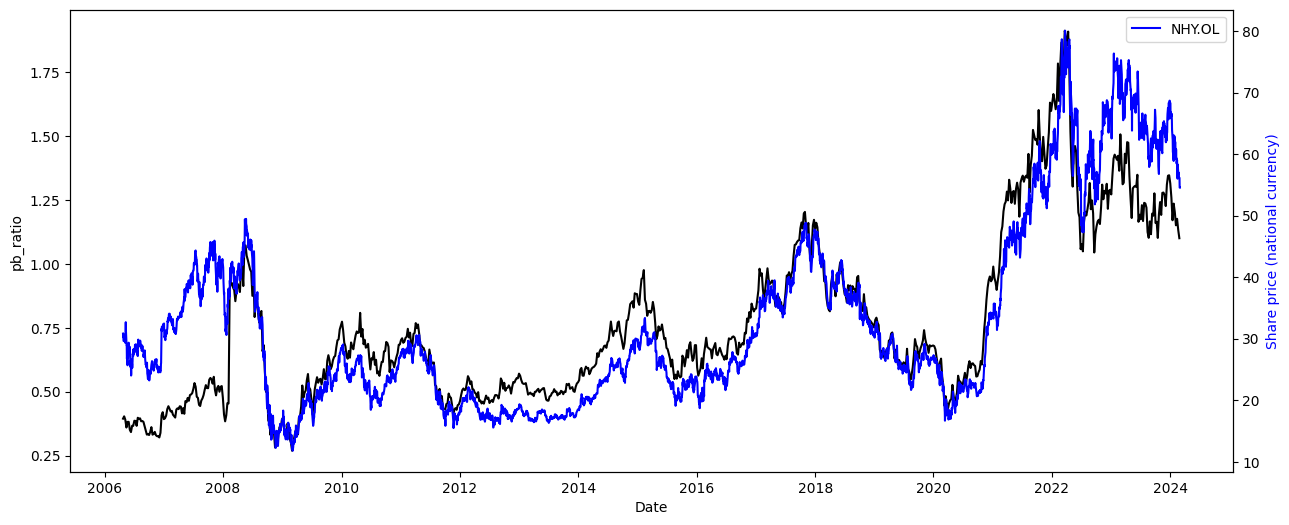

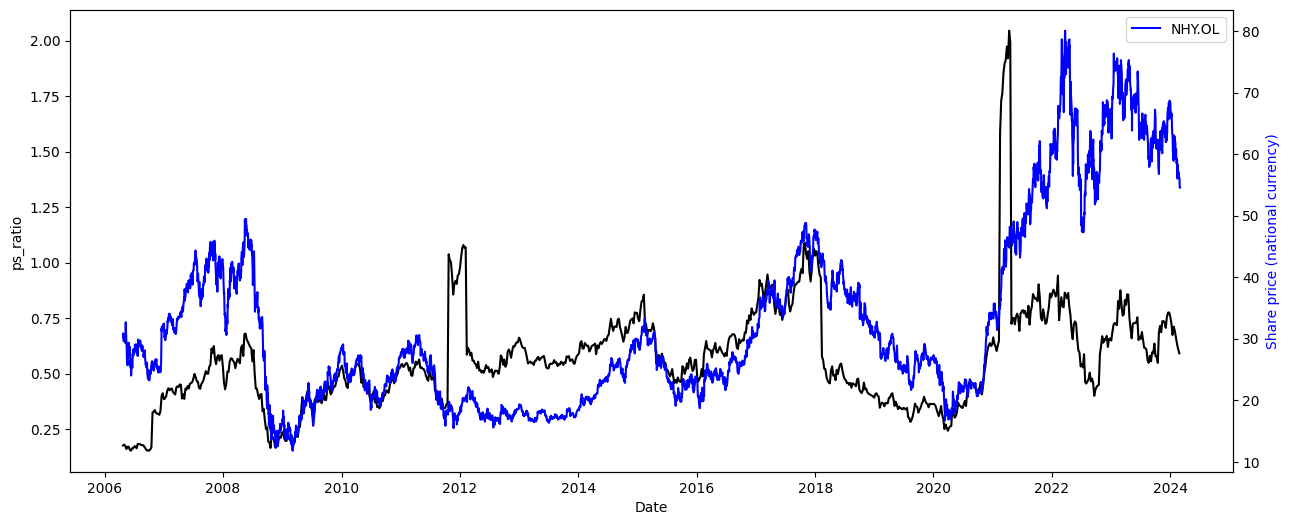

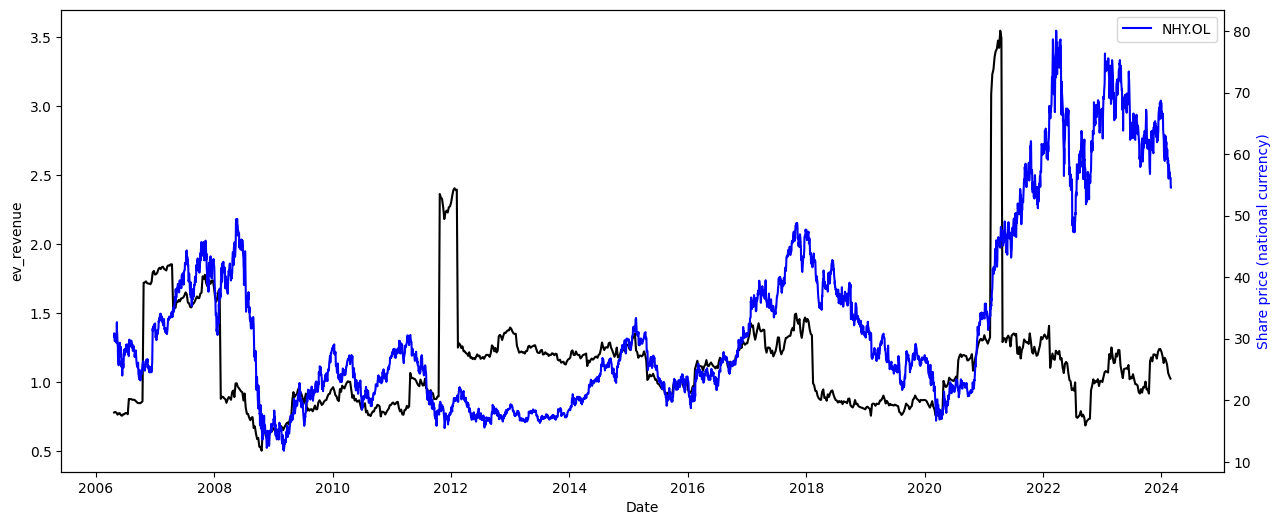

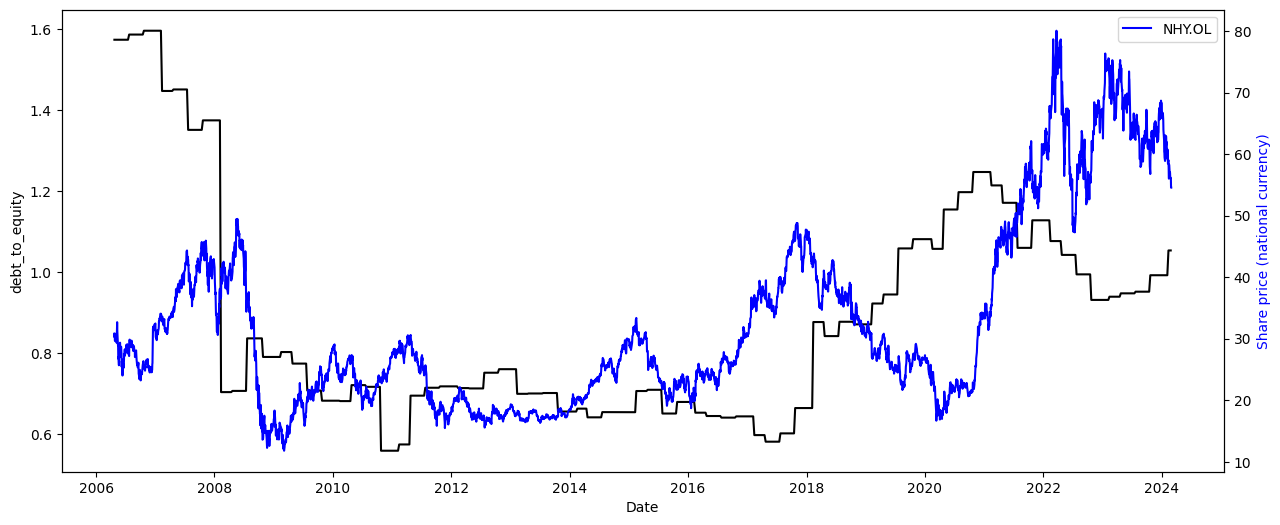

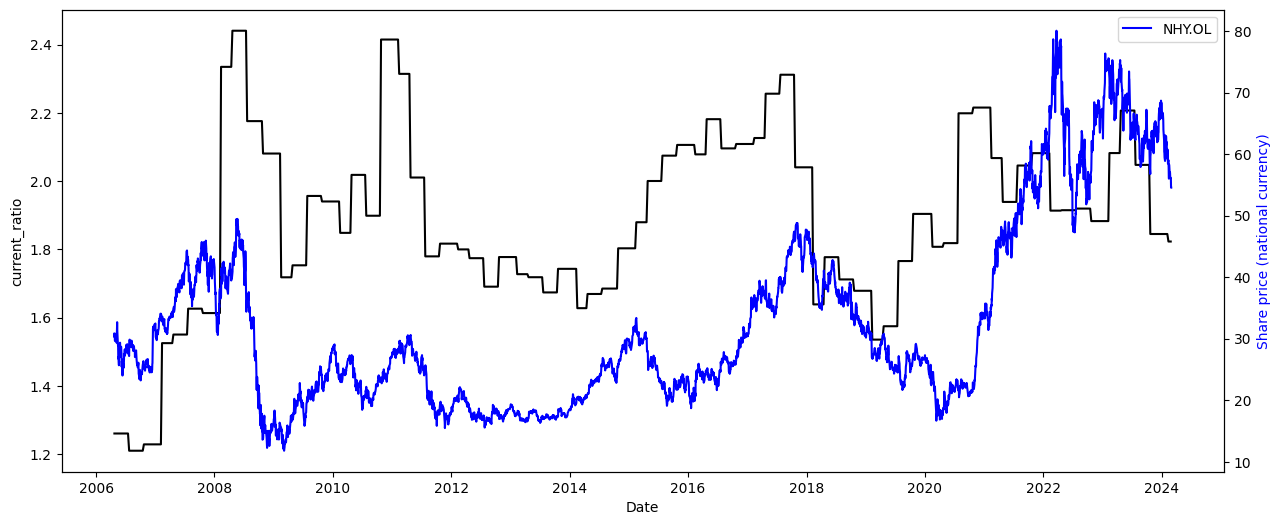

In [20]:
# plot value parameters in time and identify similar events
utils.get_historical_analouges(
    input_df=merged_nat_curr,
    ticker_all_price=ticker_all_price,
    share_name=share_name,
    tolerance=0.2
    )